Una empresa tecnológica ha recopilado información sobre el *rendimiento* y la *satisfacción *de sus *colaboradores* durante el último año. Quieren tomar decisiones estratégicas basadas en datos para *mejorar la retención del talento *y *el desempeño*. Tu rol es realizar un análisis exploratorio completo de este conjunto de datos para identificar patrones relevantes y generar recomendaciones iniciales.

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
df_empresa = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ARCHIVOS SUPERMERCADOS AE3/datosm5.csv')

print(df_empresa.head())

print(df_empresa.info())

print(df_empresa.describe())

  ID_Empleado  Edad  Años_Experiencia      Departamento Nivel_Puesto  \
0        E001    28                 3        Ingenieria       Junior   
1        E002    35                 8        Desarrollo       Senior   
2        E003    25                 2         Marketing       Junior   
3        E004    42                15  Recursos Humanos      Manager   
4        E005    30                 5        Ingenieria    Mid-level   

   Salario_USD  Horas_Extra_Mes  Rendimiento_Anual  Satisfaccion_Laboral  \
0        60000                5                8.5                     4   
1        95000               10                9.2                     5   
2        55000                2                7.8                     3   
3       120000                0                9.0                     4   
4        75000                7                8.0                     4   

   Proyectos_Completados Formacion_Continua  Tiempo_Promedio_Proyecto_Dias  \
0                     12        

In [12]:
#media, mediana, moda, desviación estándar, mínimo, máximo para las variables cuantitativas

# Identificar variables cuantitativas
variables_cuantitativas = df_empresa.select_dtypes(include=np.number).columns

print("\nMedidas Estadísticas para Variables Cuantitativas:")

for col in variables_cuantitativas:
    print(f"\nVariable: {col}")
    print(f"  Media: {df_empresa[col].mean():.2f}")
    print(f"  Mediana: {df_empresa[col].median():.2f}")

    # Calcular la moda
    la_moda = df_empresa[col].mode()
    if not la_moda.empty:
      print(f"  Moda: {la_moda.tolist()}")
    else:
      print("  Moda: No hay moda única")

    print(f"  Desviación Estándar: {df_empresa[col].std():.2f}")
    print(f"  Mínimo: {df_empresa[col].min():.2f}")
    print(f"  Máximo: {df_empresa[col].max():.2f}")


# Calcular moda para estas variables categoricas
variables_categoricas = ['Nivel_Puesto', 'Satisfaccion_Laboral']

print("\nModa para Variables Categóricas Ordinales:")
for col in variables_categoricas:
    mode_value = df_empresa[col].mode()
    if not mode_value.empty:
        print(f"  Moda de {col}: {mode_value.tolist()}")
    else:
        print(f"  Moda de {col}: No hay moda única")


Medidas Estadísticas para Variables Cuantitativas:

Variable: Edad
  Media: 33.66
  Mediana: 32.00
  Moda: [27, 28, 29]
  Desviación Estándar: 6.30
  Mínimo: 25.00
  Máximo: 47.00

Variable: Años_Experiencia
  Media: 7.74
  Mediana: 6.00
  Moda: [2, 3]
  Desviación Estándar: 5.45
  Mínimo: 1.00
  Máximo: 21.00

Variable: Salario_USD
  Media: 87240.00
  Mediana: 75500.00
  Moda: [60000]
  Desviación Estándar: 30927.54
  Mínimo: 53000.00
  Máximo: 165000.00

Variable: Horas_Extra_Mes
  Media: 4.90
  Mediana: 4.00
  Moda: [0]
  Desviación Estándar: 3.89
  Mínimo: 0.00
  Máximo: 13.00

Variable: Rendimiento_Anual
  Media: 8.50
  Mediana: 8.30
  Moda: [8.0]
  Desviación Estándar: 0.79
  Mínimo: 7.30
  Máximo: 9.90

Variable: Satisfaccion_Laboral
  Media: 3.82
  Mediana: 4.00
  Moda: [4]
  Desviación Estándar: 0.90
  Mínimo: 2.00
  Máximo: 5.00

Variable: Proyectos_Completados
  Media: 11.88
  Mediana: 10.50
  Moda: [8, 9]
  Desviación Estándar: 4.26
  Mínimo: 5.00
  Máximo: 21.00

Variable

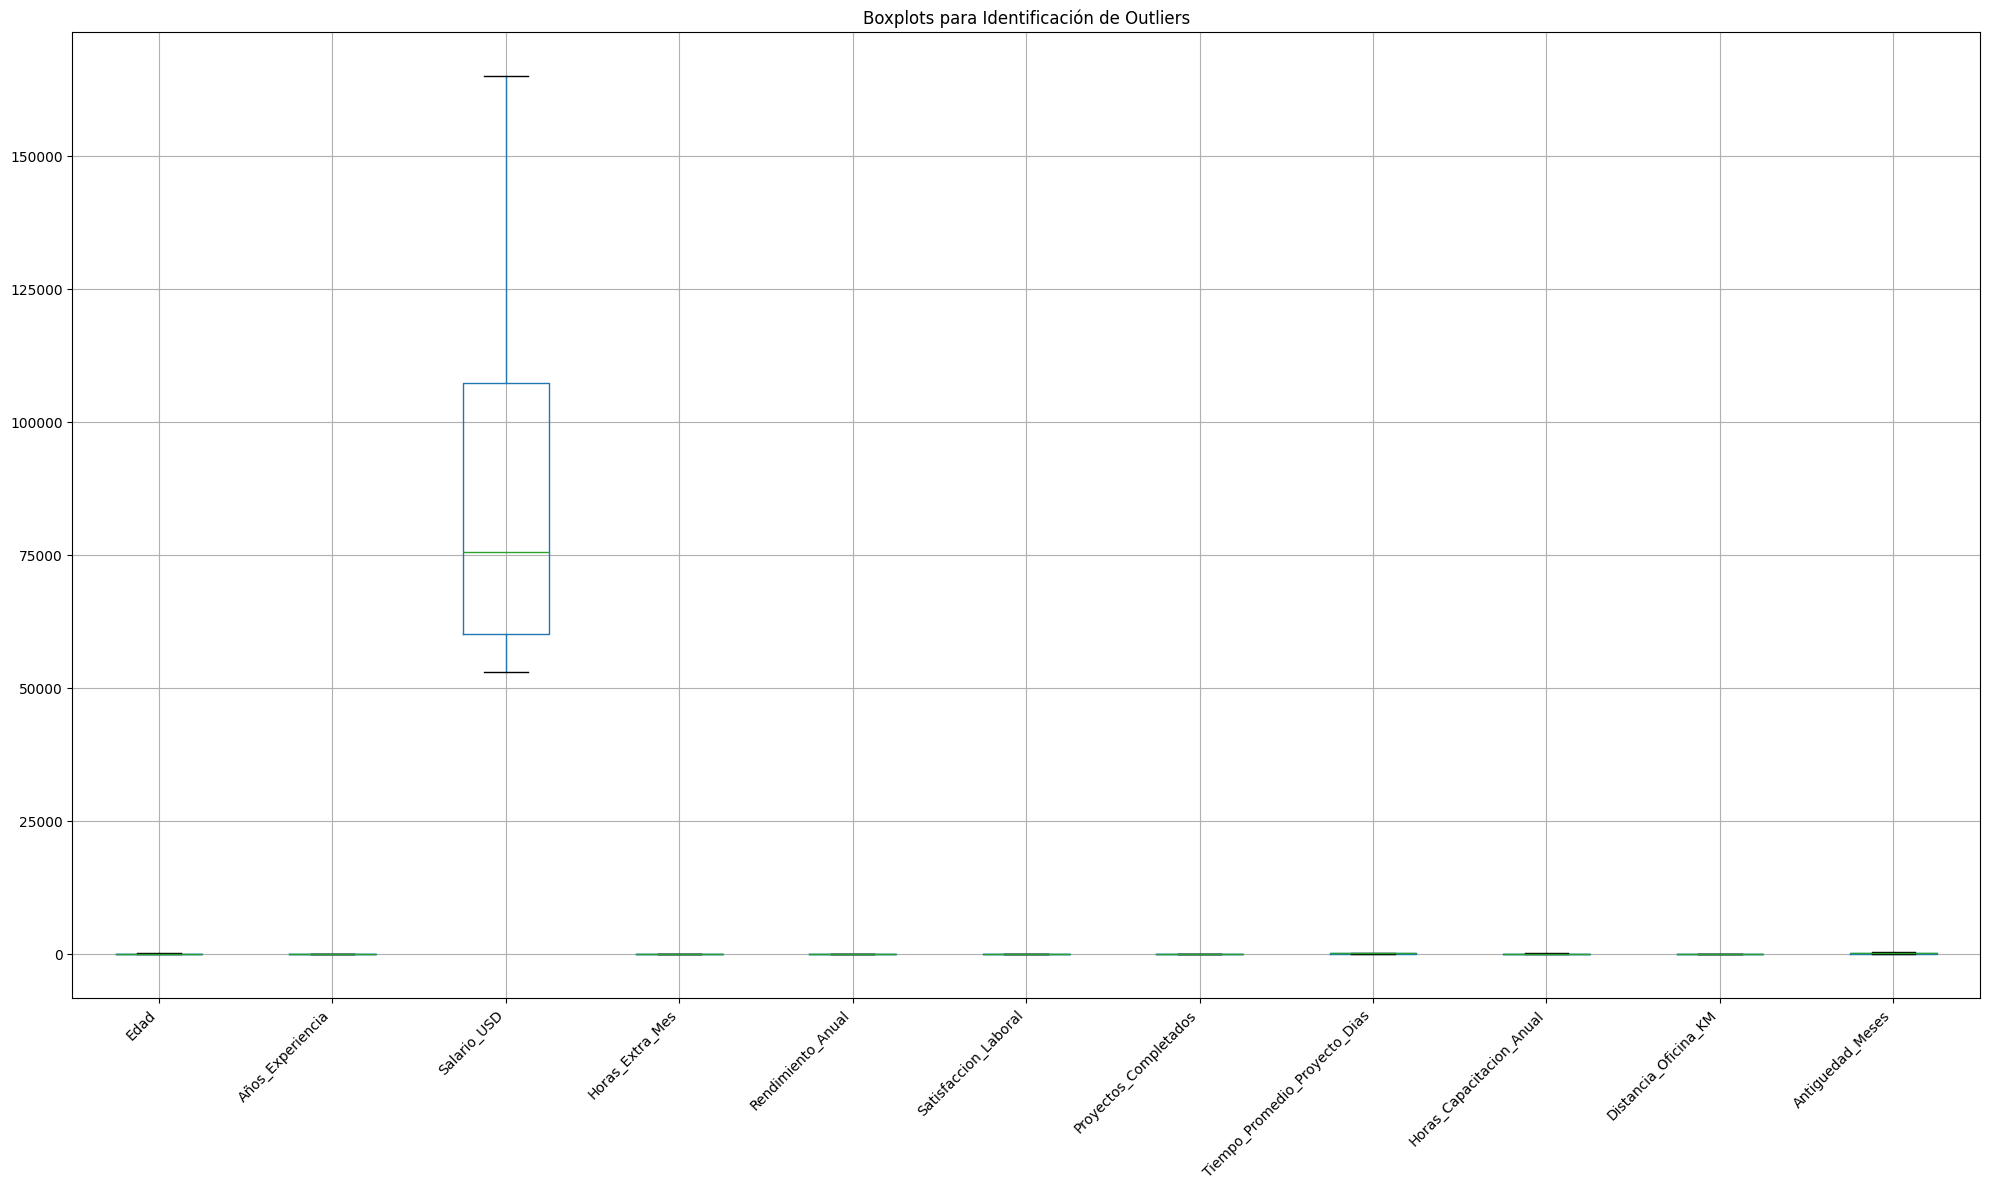


Identificación de Outliers usando el método IQR:

Variable: Edad
  Rango Intercuartílico (IQR): 9.75
  Límite Inferior (IQR): 13.62
  Límite Superior (IQR): 52.62
  Número de Outliers detectados (IQR): 0

Variable: Años_Experiencia
  Rango Intercuartílico (IQR): 7.75
  Límite Inferior (IQR): -8.62
  Límite Superior (IQR): 22.38
  Número de Outliers detectados (IQR): 0

Variable: Salario_USD
  Rango Intercuartílico (IQR): 47250.00
  Límite Inferior (IQR): -10875.00
  Límite Superior (IQR): 178125.00
  Número de Outliers detectados (IQR): 0

Variable: Horas_Extra_Mes
  Rango Intercuartílico (IQR): 5.75
  Límite Inferior (IQR): -6.62
  Límite Superior (IQR): 16.38
  Número de Outliers detectados (IQR): 0

Variable: Rendimiento_Anual
  Rango Intercuartílico (IQR): 1.27
  Límite Inferior (IQR): 5.99
  Límite Superior (IQR): 11.09
  Número de Outliers detectados (IQR): 0

Variable: Satisfaccion_Laboral
  Rango Intercuartílico (IQR): 1.00
  Límite Inferior (IQR): 1.50
  Límite Superior (IQR)

In [8]:
# Identificar posibles outliers utilizando boxplots o métodos estadísticos.

# columnas numéricas para el análisis de outliers
df_numeric_outliers = df_empresa.select_dtypes(include=np.number)


# ango intercuartílico (IQR)
print("\nIdentificación de Outliers usando el método IQR:")

for col in df_numeric_outliers.columns:
    Q1 = df_numeric_outliers[col].quantile(0.25)
    Q3 = df_numeric_outliers[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df_numeric_outliers[(df_numeric_outliers[col] < lower_bound) | (df_numeric_outliers[col] > upper_bound)]

    print(f"\nVariable: {col}")
    print(f"  Rango Intercuartílico (IQR): {IQR:.2f}")
    print(f"  Límite Inferior (IQR): {lower_bound:.2f}")
    print(f"  Límite Superior (IQR): {upper_bound:.2f}")
    print(f"  Número de Outliers detectados (IQR): {len(outliers)}")
    if not outliers.empty:
      print(f"  Posibles Outliers (primeros 5):\n{outliers.head()}")

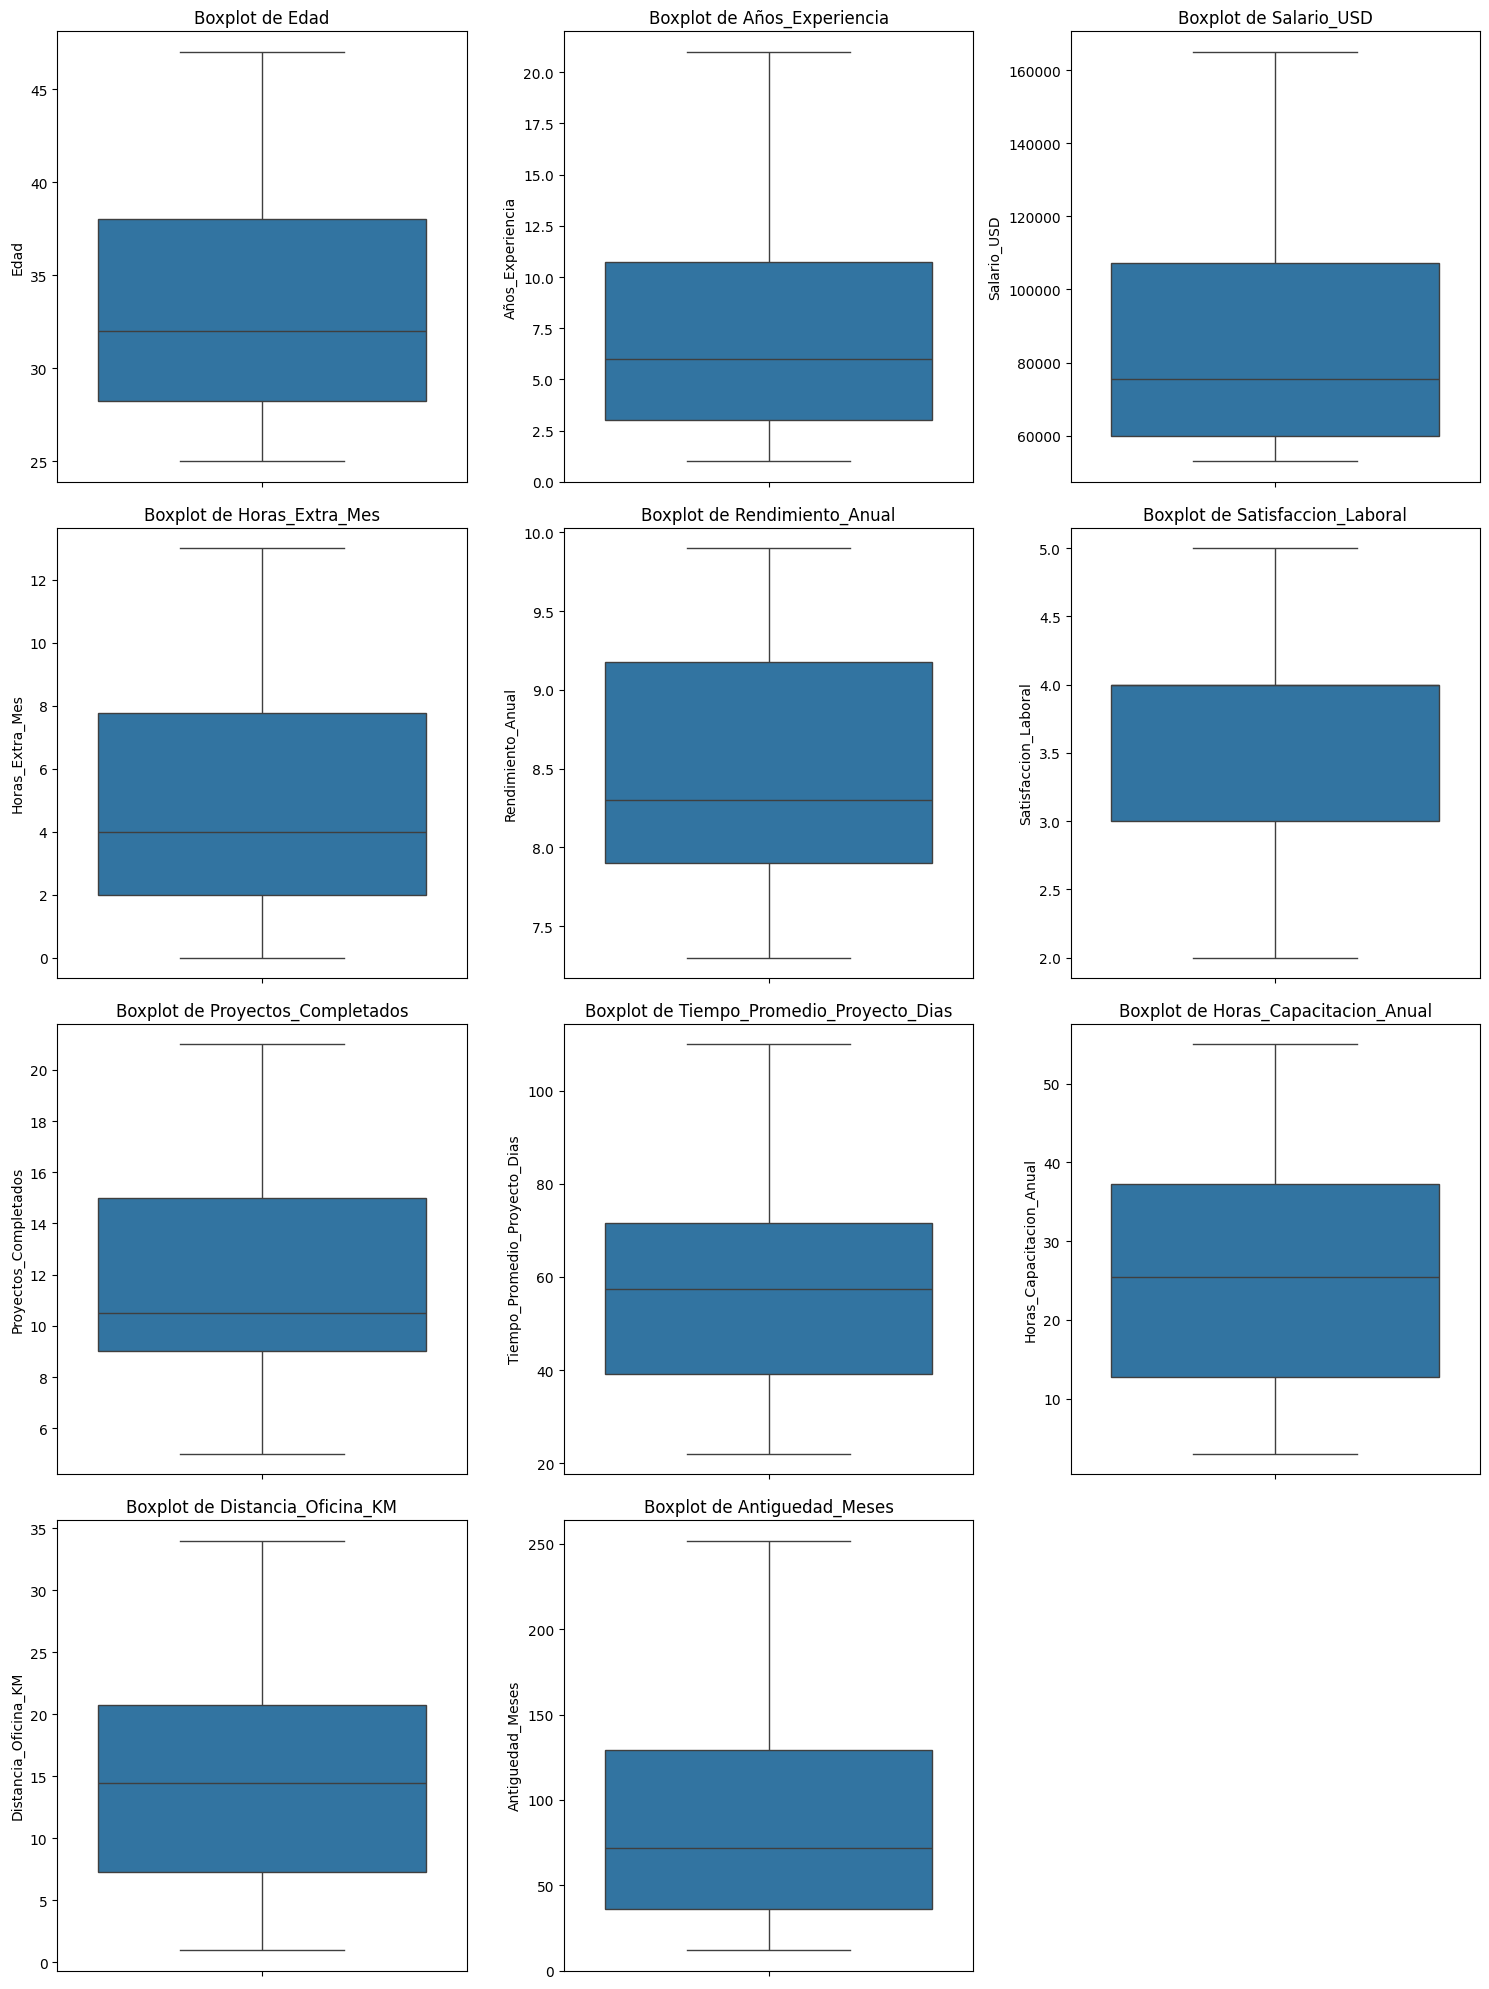

In [10]:
# Obtener las columnas numéricas
variables_cuantitativas = df_empresa.select_dtypes(include=np.number).columns

# Calcular el número de filas y columnas para los subplots
n_variables = len(variables_cuantitativas)
n_cols = 3  # Puedes ajustar este número según cuántas columnas quieras por fila
n_rows = (n_variables + n_cols - 1) // n_cols  # Calcula el número de filas necesario

# Crear la figura y los subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 5)) # Ajusta el tamaño de la figura según el número de filas
axes = axes.flatten() # Aplanar el array de axes para iterar fácilmente

# Crear un boxplot para cada variable cuantitativa en su subplot
for i, col in enumerate(variables_cuantitativas):
    sns.boxplot(y=df_empresa[col], ax=axes[i])
    axes[i].set_title(f'Boxplot de {col}')
    axes[i].set_ylabel(col)

# Ocultar los subplots vacíos si los hay
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout() # Ajustar el layout para evitar solapamiento
plt.show()

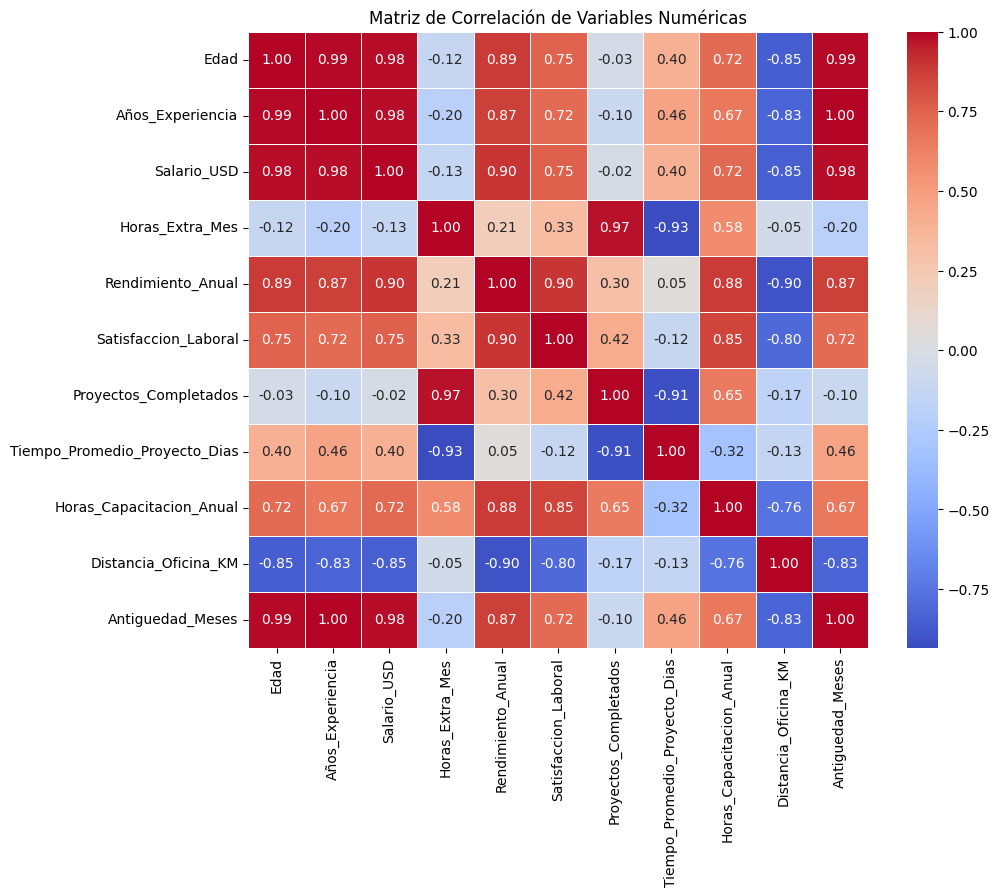

In [3]:

df_numeric = df_empresa.select_dtypes(include=np.number)

# Calcular la matriz de correlación
matriz_correlacion = df_numeric.corr()

# Visualizar la matriz de correlación usando un mapa de calor (heatmap)
plt.figure(figsize=(10, 8))
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlación de Variables Numéricas')
plt.show()

Al observar el mapa de calor, es posible identificar de forma rápida y visual cuáles son las variables que están más relacionadas con nuestras variables objetivo.

Para la variable Rendimiento Anual, se observa una correlación fuerte con las siguientes variables: Antigüedad, Distancia a la oficina, Horas de capacitación, Satisfacción laboral, Salario, Años de experiencia y Edad.

En el caso de Satisfacción Laboral, las variables relacionadas son prácticamente las mismas, aunque con un grado de correlación ligeramente menor.

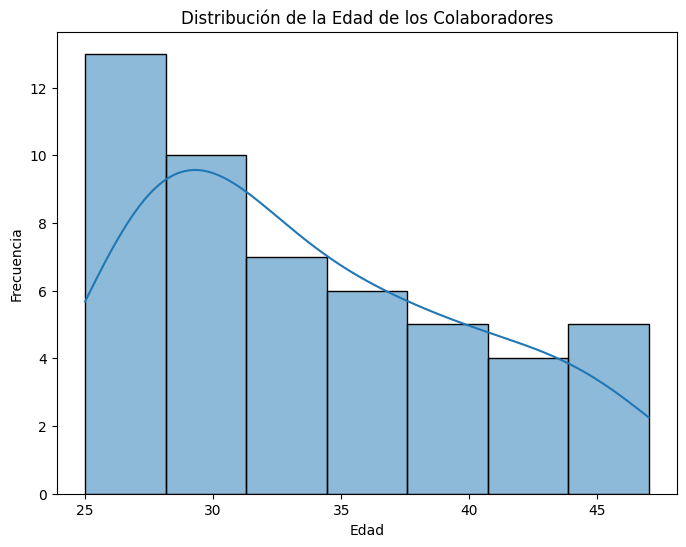

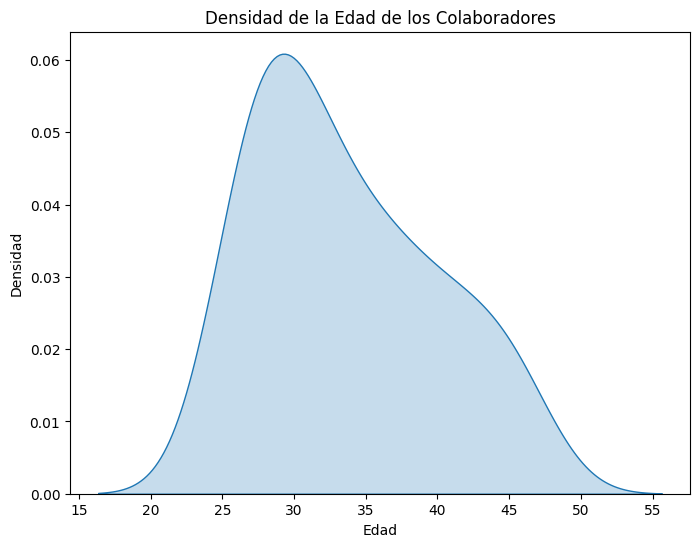

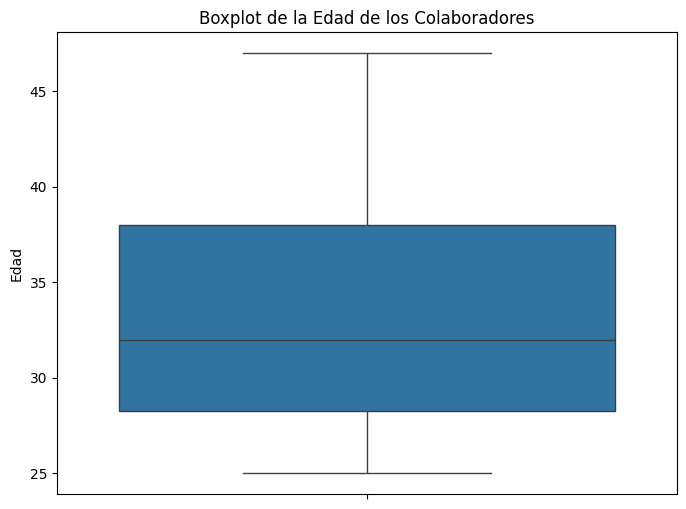

In [13]:
# prompt: Analizar la distribución de una variable numérica. vamos a analizar edad

# Histograma para 'Edad'
plt.figure(figsize=(8, 6))
sns.histplot(data=df_empresa, x='Edad', kde=True)
plt.title('Distribución de la Edad de los Colaboradores')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

# Gráfico de densidad para 'Edad'
plt.figure(figsize=(8, 6))
sns.kdeplot(data=df_empresa, x='Edad', fill=True)
plt.title('Densidad de la Edad de los Colaboradores')
plt.xlabel('Edad')
plt.ylabel('Densidad')
plt.show()

# Boxplot para 'Edad' (aunque ya se generó uno general, se puede hacer uno específico)
plt.figure(figsize=(8, 6))
sns.boxplot(y=df_empresa['Edad'])
plt.title('Boxplot de la Edad de los Colaboradores')
plt.ylabel('Edad')
plt.show()

Histograma de la Edad: EPodemos observar que la distribución de la edad parece estar ligeramente sesgada hacia la derecha, lo que significa que hay una mayor concentración de empleados más jóvenes en la empresa. Los mismo se ve reflejado en el grafico de densidad,.

el boxplot de la Edad nos muestra la distribución de las edades de los empleados, la ubicación de la mediana y la dispersión de los datos, confirmando que la mayoría de las edades se encuentran dentro de un rango esperado y sin la presencia de outliers según esta visualización.

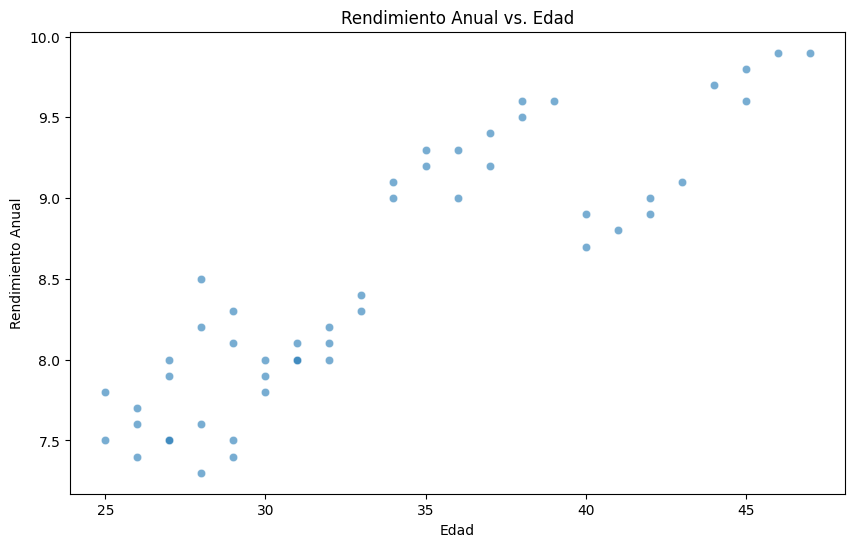

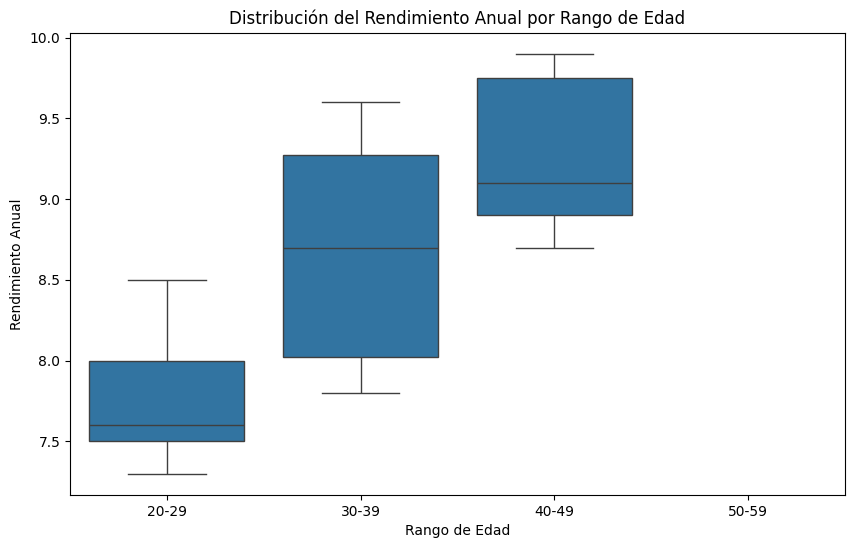

/tmp/ipython-input-19-1356014174.py:28: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_empresa, x='Rango_Edad', y='Rendimiento_Anual', order=labels, ci=None)


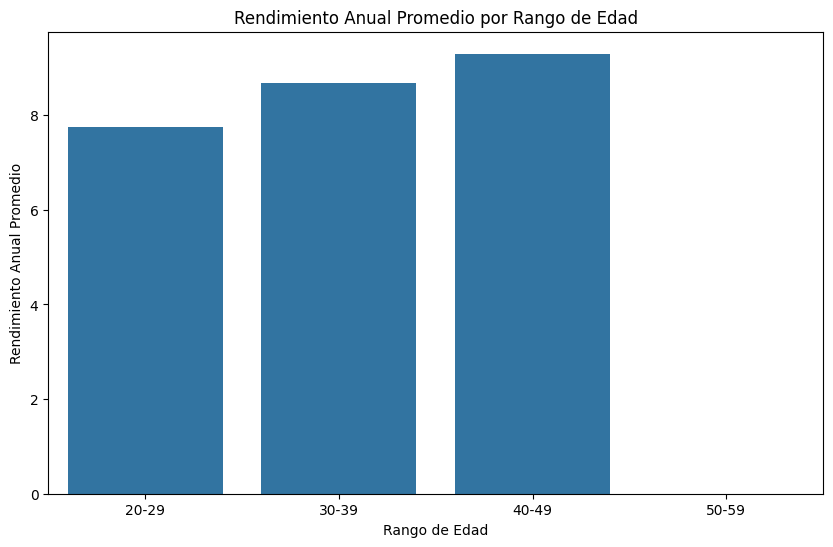

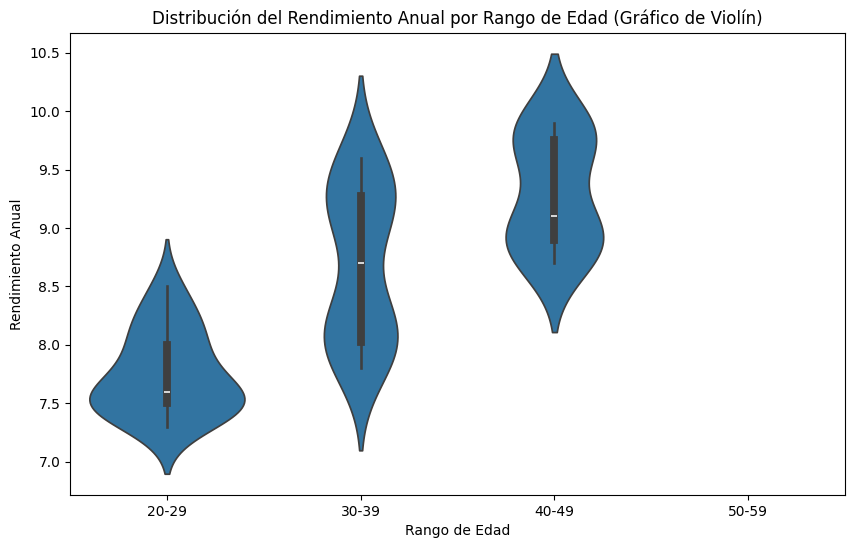

In [19]:
# prompt: analizar graficamente con 4 visualizaciones el rendimiento por edad

# Análisis gráfico del rendimiento por edad con 4 visualizaciones

# Scatter plot: Rendimiento vs. Edad
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_empresa, x='Edad', y='Rendimiento_Anual', alpha=0.6)
plt.title('Rendimiento Anual vs. Edad')
plt.xlabel('Edad')
plt.ylabel('Rendimiento Anual')
plt.show()

# Boxplot: Rendimiento por rangos de Edad (discretizando la edad)
# Podemos crear rangos de edad para visualizar la distribución del rendimiento en cada grupo.
bins = [20, 30, 40, 50, 60]
labels = ['20-29', '30-39', '40-49', '50-59']
df_empresa['Rango_Edad'] = pd.cut(df_empresa['Edad'], bins=bins, labels=labels, right=False)

plt.figure(figsize=(10, 6))
sns.boxplot(data=df_empresa, x='Rango_Edad', y='Rendimiento_Anual', order=labels)
plt.title('Distribución del Rendimiento Anual por Rango de Edad')
plt.xlabel('Rango de Edad')
plt.ylabel('Rendimiento Anual')
plt.show()

# Gráfico de barras: Rendimiento promedio por rango de edad
plt.figure(figsize=(10, 6))
sns.barplot(data=df_empresa, x='Rango_Edad', y='Rendimiento_Anual', order=labels, ci=None)
plt.title('Rendimiento Anual Promedio por Rango de Edad')
plt.xlabel('Rango de Edad')
plt.ylabel('Rendimiento Anual Promedio')
plt.show()

# Gráfico de violín: Distribución del rendimiento por rangos de edad
plt.figure(figsize=(10, 6))
sns.violinplot(data=df_empresa, x='Rango_Edad', y='Rendimiento_Anual', order=labels)
plt.title('Distribución del Rendimiento Anual por Rango de Edad (Gráfico de Violín)')
plt.xlabel('Rango de Edad')
plt.ylabel('Rendimiento Anual')
plt.show()


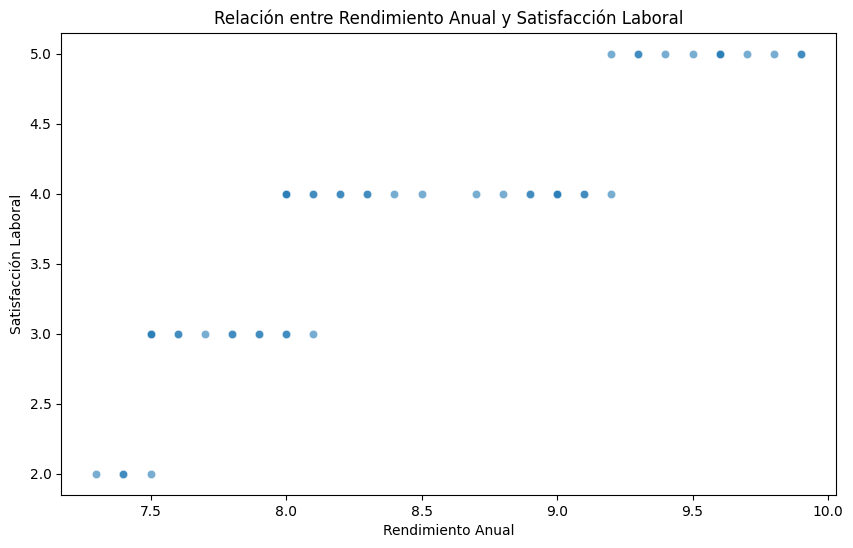


Correlación entre Rendimiento Anual y Satisfacción Laboral: 0.90


In [20]:
# Gráfico de dispersión entre 'Rendimiento_Anual' y 'Satisfaccion_Laboral'
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_empresa, x='Rendimiento_Anual', y='Satisfaccion_Laboral', alpha=0.6)
plt.title('Relación entre Rendimiento Anual y Satisfacción Laboral')
plt.xlabel('Rendimiento Anual')
plt.ylabel('Satisfacción Laboral')
plt.show()

correlacion_rend_sat = matriz_correlacion.loc['Rendimiento_Anual', 'Satisfaccion_Laboral']
print(f"\nCorrelación entre Rendimiento Anual y Satisfacción Laboral: {correlacion_rend_sat:.2f}")

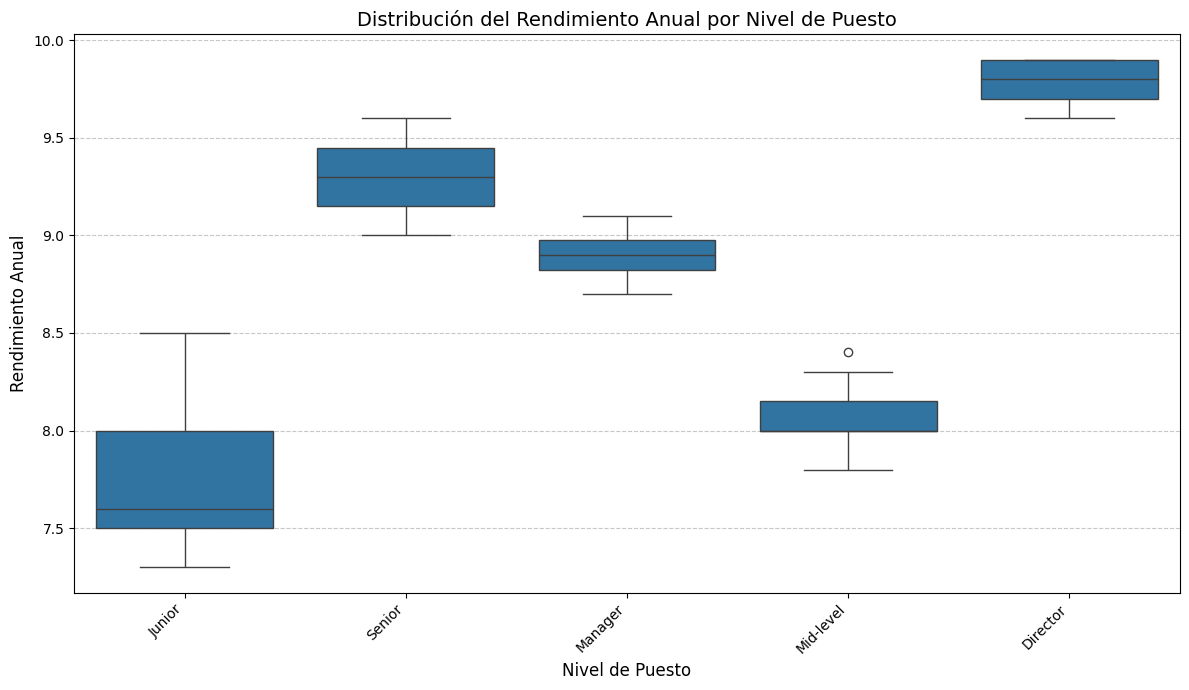

/tmp/ipython-input-21-3251936269.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_empresa, x='Nivel_Puesto', y='Satisfaccion_Laboral', order=df_empresa['Nivel_Puesto'].unique(), palette='viridis')


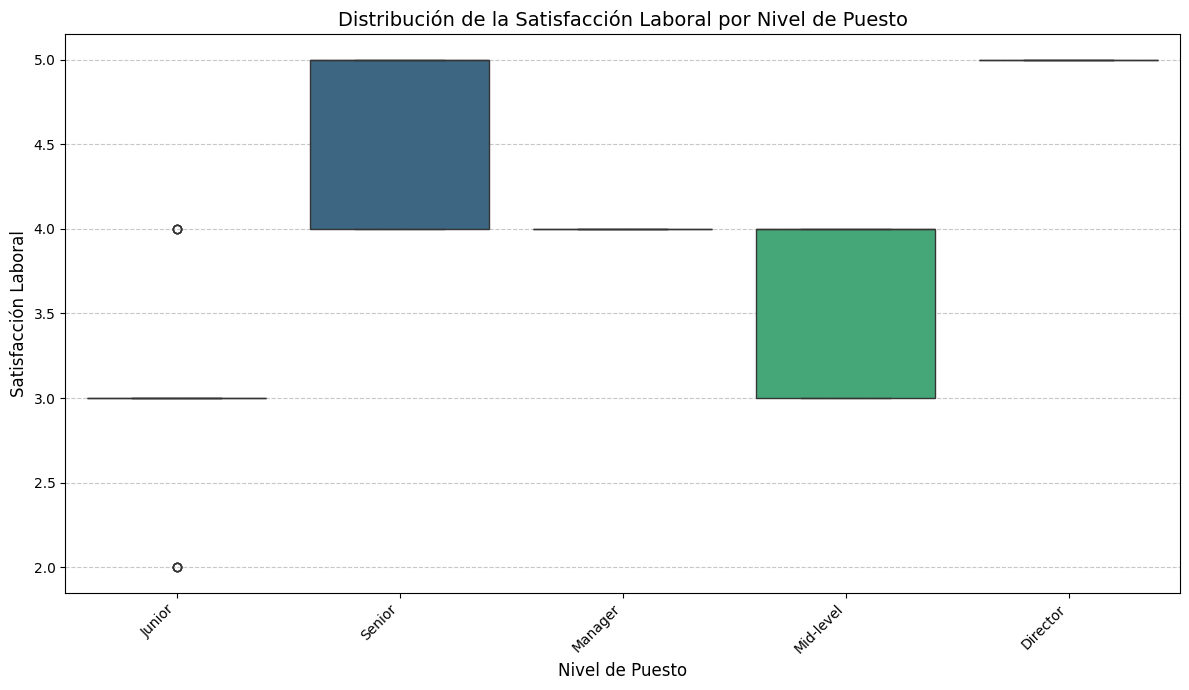

/tmp/ipython-input-21-3251936269.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_empresa, x='Rango_Edad', y='Rendimiento_Anual', order=labels, palette='magma')


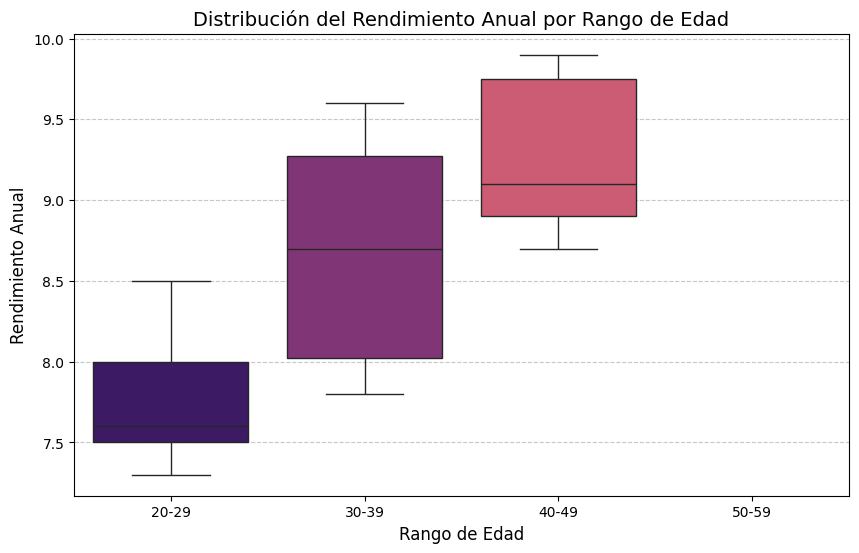

/tmp/ipython-input-21-3251936269.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_empresa, x='Rango_Edad', y='Satisfaccion_Laboral', order=labels, palette='plasma')


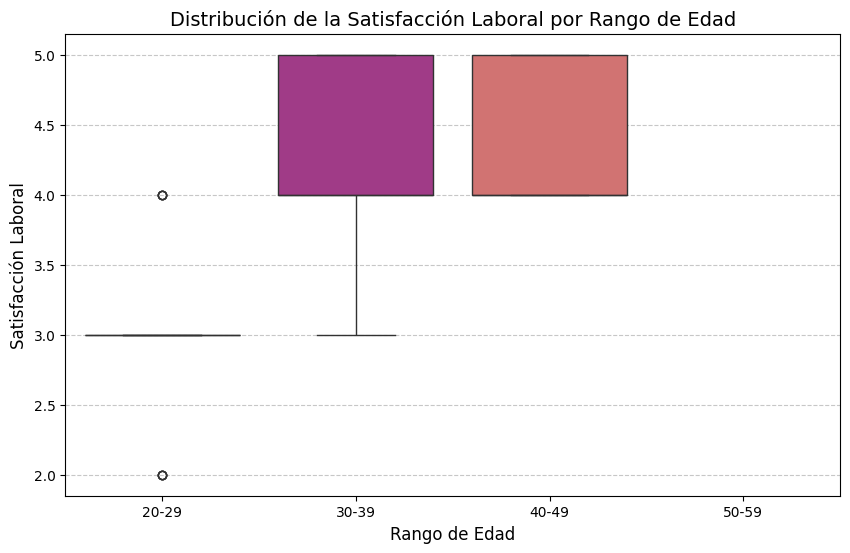

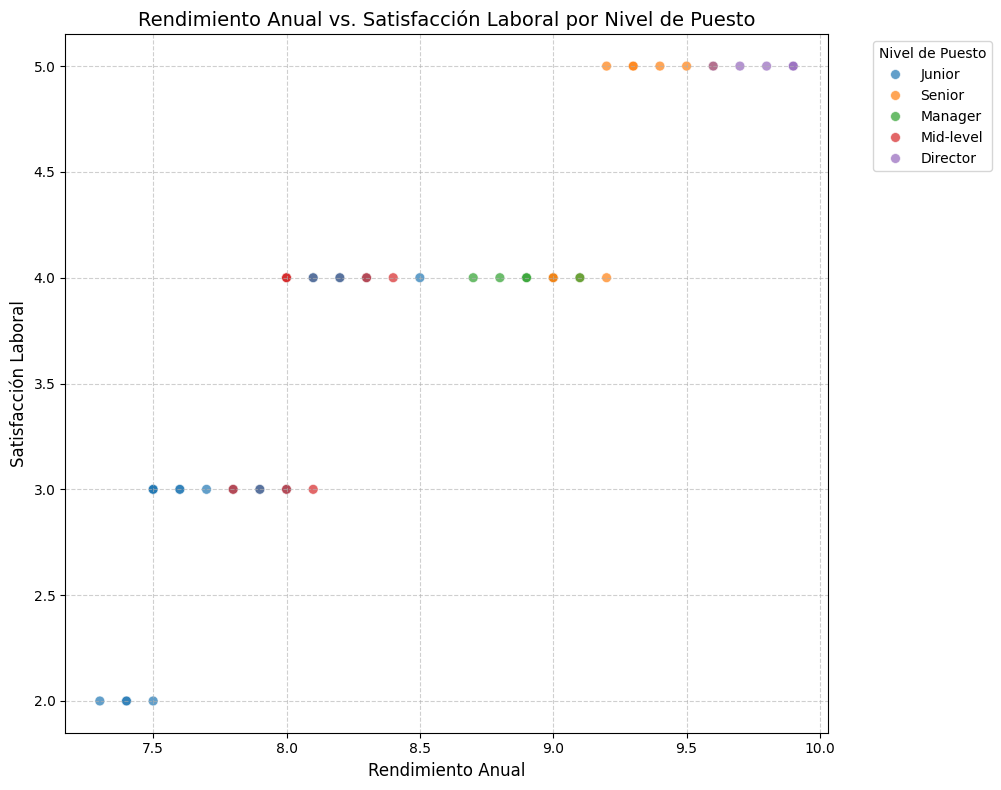

In [21]:

# Comparar rendimiento entre diferentes niveles de puesto
plt.figure(figsize=(12, 7))
sns.boxplot(data=df_empresa, x='Nivel_Puesto', y='Rendimiento_Anual', order=df_empresa['Nivel_Puesto'].unique())
plt.title('Distribución del Rendimiento Anual por Nivel de Puesto', fontsize=14)
plt.xlabel('Nivel de Puesto', fontsize=12)
plt.ylabel('Rendimiento Anual', fontsize=12)
plt.xticks(rotation=45, ha='right') # Rotar etiquetas del eje x si son largas
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout() # Ajustar el layout para evitar solapamiento
plt.show()

# Comparar satisfacción laboral entre diferentes niveles de puesto
plt.figure(figsize=(12, 7))
sns.boxplot(data=df_empresa, x='Nivel_Puesto', y='Satisfaccion_Laboral', order=df_empresa['Nivel_Puesto'].unique(), palette='viridis')
plt.title('Distribución de la Satisfacción Laboral por Nivel de Puesto', fontsize=14)
plt.xlabel('Nivel de Puesto', fontsize=12)
plt.ylabel('Satisfacción Laboral', fontsize=12)
plt.xticks(rotation=45, ha='right') # Rotar etiquetas del eje x si son largas
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout() # Ajustar el layout para evitar solapamiento
plt.show()

# Comparar rendimiento entre diferentes rangos de edad
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_empresa, x='Rango_Edad', y='Rendimiento_Anual', order=labels, palette='magma')
plt.title('Distribución del Rendimiento Anual por Rango de Edad', fontsize=14)
plt.xlabel('Rango de Edad', fontsize=12)
plt.ylabel('Rendimiento Anual', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Comparar satisfacción laboral entre diferentes rangos de edad
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_empresa, x='Rango_Edad', y='Satisfaccion_Laboral', order=labels, palette='plasma')
plt.title('Distribución de la Satisfacción Laboral por Rango de Edad', fontsize=14)
plt.xlabel('Rango de Edad', fontsize=12)
plt.ylabel('Satisfacción Laboral', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Scatter plot con diferenciación por Nivel de Puesto
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df_empresa, x='Rendimiento_Anual', y='Satisfaccion_Laboral', hue='Nivel_Puesto', alpha=0.7, s=50) # s ajusta el tamaño de los puntos
plt.title('Rendimiento Anual vs. Satisfacción Laboral por Nivel de Puesto', fontsize=14)
plt.xlabel('Rendimiento Anual', fontsize=12)
plt.ylabel('Satisfacción Laboral', fontsize=12)
plt.legend(title='Nivel de Puesto', bbox_to_anchor=(1.05, 1), loc='upper left') # Mover leyenda fuera del gráfico
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout(rect=[0, 0, 0.85, 1]) # Ajustar el layout para dejar espacio a la leyenda
plt.show()

                            OLS Regression Results                            
Dep. Variable:      Rendimiento_Anual   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.808
Method:                 Least Squares   F-statistic:                     206.9
Date:                Fri, 27 Jun 2025   Prob (F-statistic):           5.02e-19
Time:                        01:20:00   Log-Likelihood:                -16.842
No. Observations:                  50   AIC:                             37.68
Df Residuals:                      48   BIC:                             41.51
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    5.4737 

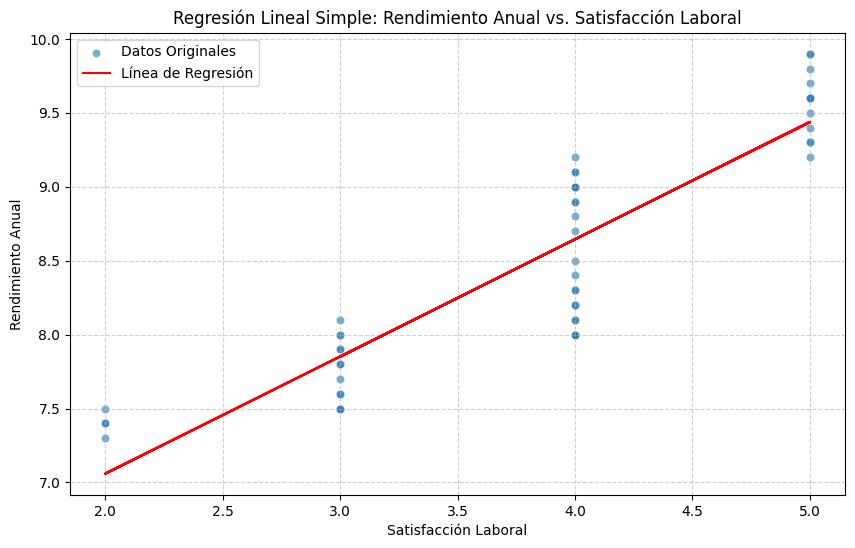

In [22]:


import statsmodels.api as sm


X = df_empresa['Satisfaccion_Laboral']  # Variable independiente
y = df_empresa['Rendimiento_Anual']      # Variable dependiente

# Agregar una constante al modelo (para el intercepto)
X = sm.add_constant(X)

# Crear el modelo de regresión lineal
model = sm.OLS(y, X)

# Entrenar el modelo
results = model.fit()

# Imprimir el resumen de los resultados
print(results.summary())

# Interpretar los coeficientes y el R²
print("\nInterpretación del Modelo:")
print(f"Coeficiente (constante/intercepto): {results.params['const']:.2f}")
print(f"Coeficiente (Satisfaccion_Laboral): {results.params['Satisfaccion_Laboral']:.2f}")
print(f"R-squared (Coeficiente de determinación): {results.rsquared:.2f}")

print("\nInterpretación:")
print(f"- El intercepto ({results.params['const']:.2f}) representa el rendimiento anual estimado cuando la satisfacción laboral es 0. Sin embargo, un valor de satisfacción laboral de 0 puede no ser significativo en este contexto.")
print(f"- El coeficiente de Satisfaccion_Laboral ({results.params['Satisfaccion_Laboral']:.2f}) indica que, por cada unidad de aumento en la satisfacción laboral, el rendimiento anual estimado aumenta en aproximadamente {results.params['Satisfaccion_Laboral']:.2f} unidades, manteniendo otros factores constantes.")
print(f"- El R-squared ({results.rsquared:.2f}) indica la proporción de la varianza en el rendimiento anual que es explicada por la satisfacción laboral. Un R² de {results.rsquared:.2f} sugiere que la satisfacción laboral explica el {results.rsquared*100:.2f}% de la variabilidad en el rendimiento anual.")
if results.rsquared < 0.3: # Umbral sugerido para R-squared bajo
    print("  El valor de R² es bajo, lo que sugiere que la satisfacción laboral por sí sola no explica una gran parte de la varianza en el rendimiento anual. Es probable que otros factores (no incluidos en este modelo simple) tengan una influencia significativa.")
elif results.rsquared < 0.7: # Umbral sugerido para R-squared moderado
    print("  El valor de R² es moderado, lo que indica que la satisfacción laboral tiene alguna capacidad para explicar la varianza en el rendimiento anual, pero hay otros factores importantes que no están siendo considerados.")
else: # Umbral sugerido para R-squared alto
     print("  El valor de R² es alto, lo que sugiere que la satisfacción laboral explica una gran parte de la varianza en el rendimiento anual.")


# Visualización de la regresión lineal simple
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_empresa, x='Satisfaccion_Laboral', y='Rendimiento_Anual', alpha=0.6, label='Datos Originales')
plt.plot(df_empresa['Satisfaccion_Laboral'], results.predict(X), color='red', label='Línea de Regresión')
plt.title('Regresión Lineal Simple: Rendimiento Anual vs. Satisfacción Laboral')
plt.xlabel('Satisfacción Laboral')
plt.ylabel('Rendimiento Anual')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


# Resumen del Análisis Exploratorio de Datos de Rendimiento y Satisfacción de Colaboradores

## Objetivo

Analizar datos de rendimiento y satisfacción de colaboradores para identificar patrones y proponer acciones para mejorar la retención y el desempeño.

## Hallazgos Principales

*   Las variables numéricas muestran distribuciones esperadas sin outliers significativos (ver boxplots).
*   Existe una fuerte correlación positiva entre **Rendimiento Anual** y **Satisfacción Laboral**, confirmada por un mapa de calor. Otras variables como Salario, Experiencia y Antigüedad también se relacionan positivamente con el rendimiento.
*   La distribución de **Edad** muestra una concentración de empleados más jóvenes.

## Interpretación del Modelo de Regresión

*   Un modelo de regresión lineal simple muestra que la **Satisfacción Laboral es un predictor fuerte y positivo del Rendimiento Anual**.
*   Por cada unidad de aumento en Satisfacción Laboral, el Rendimiento Anual aumenta en aproximadamente 0.79 unidades.
*   La Satisfacción Laboral explica alrededor del 81% de la variabilidad en el Rendimiento Anual (R² = 0.81).

## Conclusiones e Insights

*   La **Satisfacción Laboral es un factor clave** para un alto Rendimiento Anual.
*   Invertir en la satisfacción de los empleados puede ser una estrategia efectiva para mejorar el desempeño.
*   Se deben considerar otros factores (salario, experiencia, capacitación) que también influyen en el rendimiento.
*   El análisis futuro debería enfocarse en la variable **"Rotacion"** para identificar los factores que impactan directamente en la retención del talento y así generar recomendaciones específicas para disminuirla.